Line plot demo
=========
This example shows you how to make a line plot using the `psyplot.project.ProjectPlotter.lineplot` method.

In [1]:
import psyplot.project as psy
import numpy as np
%config InlineBackend.close_figures = False

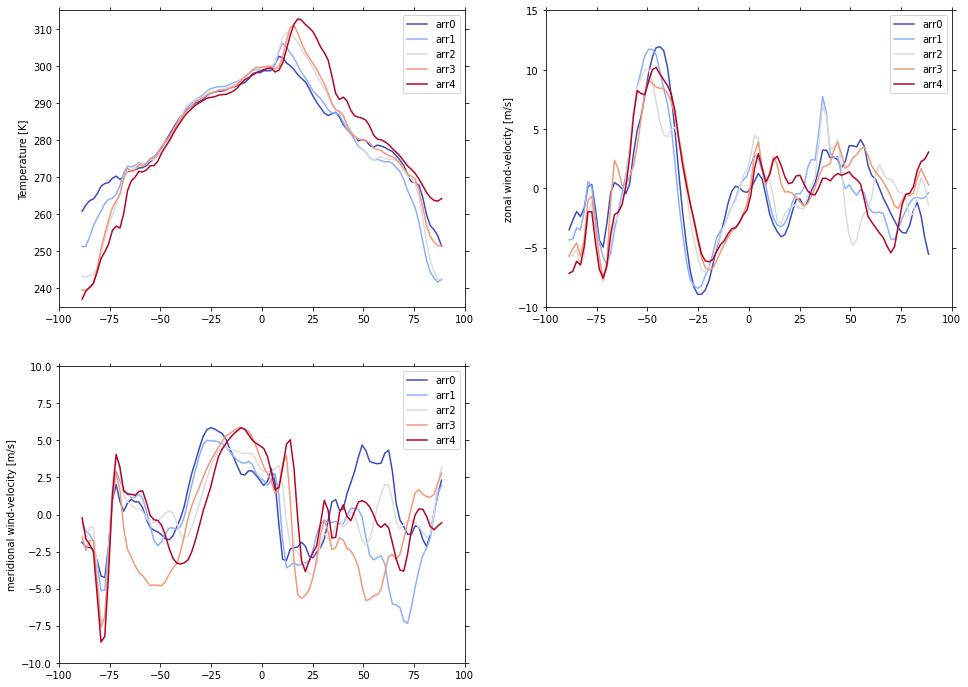

In [2]:
axes = iter(psy.multiple_subplots(2, 2, n=3))
for var in ['t2m', 'u', 'v']:
    psy.plot.lineplot(
        'demo.nc',  # netCDF file storing the data
        name=var, # one plot for each variable
        t=range(5),  # one line for each time step
        z=0, x=0,      # choose latitude and longitude as dimensions
        ylabel="{desc}",  # use the longname and units on the y-axis
        ax=next(axes),
        color='coolwarm',
    )

Okay, now we want to show the legend. As we show one line per timestep (and actually it's one line per month), we might want to label the lines accordingly. The `legendlabels` formatoption can be automatically used for this, and we can use pythons built-in [datetime](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior) formatting to format the time.

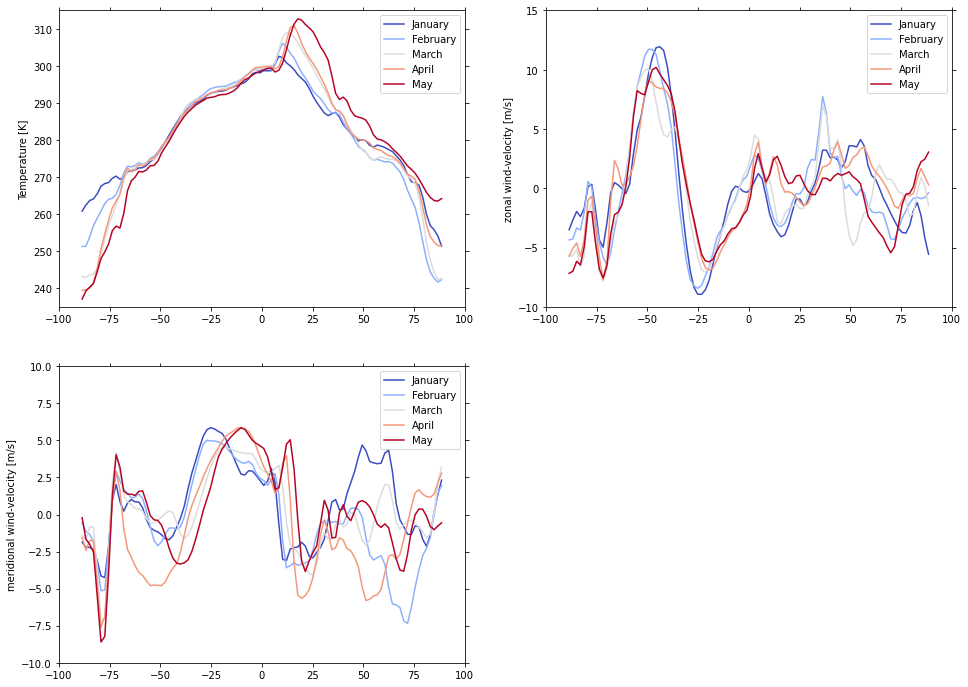

In [3]:
sp = psy.gcp(True)
sp.update(
    legendlabels="%B",   # use the Month as label for the legend
)
sp.show()

The legend is the same for all plots, so let's disable it for the last two, and show it for the first one above the plots. We can use the `legend` formatoption for this, that accepts a boolean (to enable or disable the legend), or a dictionary with keyword arguments for [matplotlibs legend](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html) function.

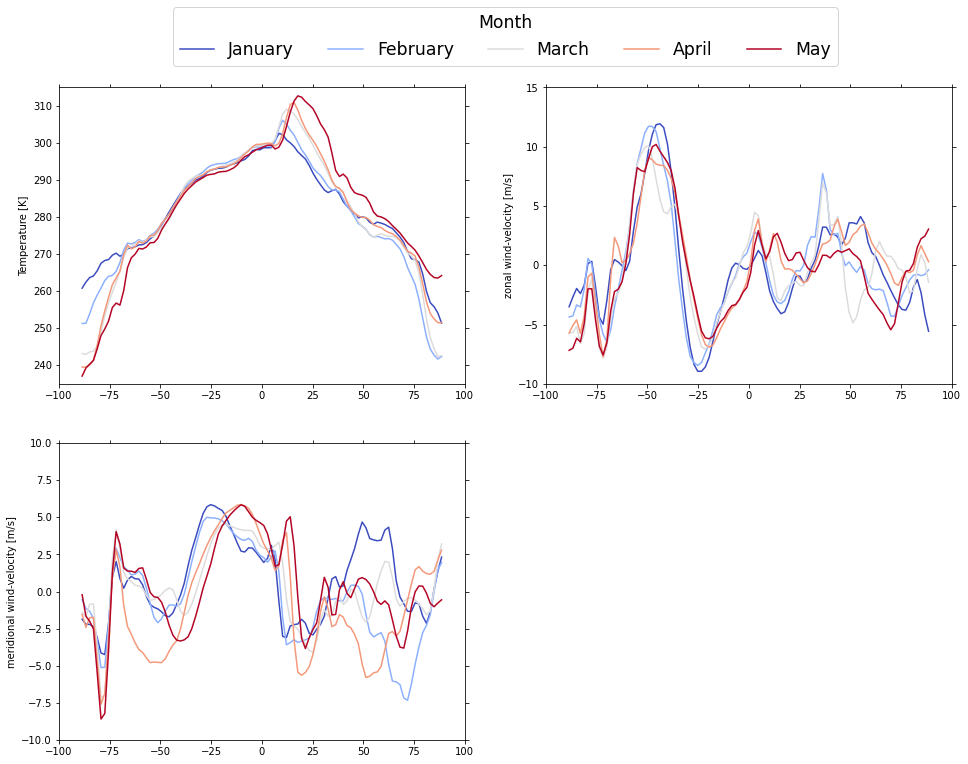

In [4]:
sp[1:].update(legend=False)  # disable the legend for the second and third plot
sp[0].psy.update(
    legend=dict(
        title="Month",
        loc="upper center",
        bbox_to_anchor=(1.1, 1.3),
        ncol=5,
        fontsize="xx-large",
        title_fontsize="xx-large",
    )
)
sp.show()

In [5]:
sp.close()

## Visualizing uncertainties

The `lineplot` plotmethod also supports the visualization of uncertainty intervals. For this example, let's assume the horizontal windspeed `u` has an uncertainty of 3 meter per second.

We save this constant variable in our dataset as `u_std`

In [6]:
ds = psy.open_dataset("demo.nc")
ds["u_std"] = ds.u.copy(data=np.ones_like(ds.u) * 3)
ds

<xarray.Dataset>
Dimensions:  (lat: 96, lev: 4, lon: 192, time: 5)
Coordinates:
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * lat      (lat) float64 88.57 86.72 84.86 83.0 ... -83.0 -84.86 -86.72 -88.57
  * lev      (lev) float64 1e+05 8.5e+04 5e+04 2e+04
  * time     (time) datetime64[ns] 1979-01-31T18:00:00 ... 1979-05-31T18:00:00
Data variables:
    t2m      (time, lev, lat, lon) float32 ...
    u        (time, lev, lat, lon) float32 -5.548854 -5.470729 ... -3.8433208
    v        (time, lev, lat, lon) float32 ...
    u_std    (time, lev, lat, lon) float32 3.0 3.0 3.0 3.0 ... 3.0 3.0 3.0 3.0
Attributes:
    CDI:          Climate Data Interface version 1.6.8 (http://mpimet.mpg.de/...
    Conventions:  CF-1.4
    history:      Mon Aug 17 22:51:40 2015: cdo -r copy test-t2m-u-v.nc test-...
    title:        Test file
    CDO:          Climate Data Operators version 1.6.8rc2 (http://mpimet.mpg....

To visualize this uncertainty, we need to pass it as `name=[[["u", "u_std"]]]` to the lineplot method.

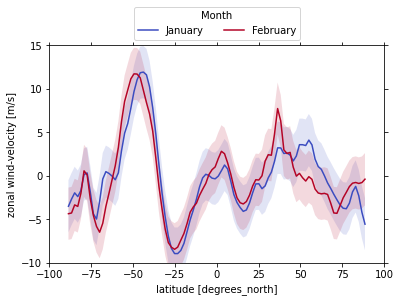

In [7]:
sp = ds.psy.plot.lineplot(
    name=[[["u", "u_std"]]],         
    t=range(2),          # one line for each time step
    z=0, x=0,            # choose latitude and longitude as dimensions
    ylabel="{desc}",     # use the longname and units on the y-axis
    xlabel="{desc}",     # use the longname and units on the x-axis
    color="coolwarm",
    legendlabels="%B",   # use the Month as label for the legend ()
    legend={"loc": "upper center", "bbox_to_anchor": (0.5, 1.2), "ncol": 2, "title": "Month"},
)

This structure parameters for `name` is important here, because it tells the lineplot how to structure the data. Using this syntax, our project `sp` now holds a list two 2D arrays, one for each line.

In [8]:
sp

psyplot.project.Project([arr3: psyplot.data.InteractiveList([
    arr0: 2-dim DataArray of u, u_std, with (variable, lat)=(2, 96), lon=0.0, lev=100000.0, time=1979-01-31T18:00:00,
    arr1: 2-dim DataArray of u, u_std, with (variable, lat)=(2, 96), lon=0.0, lev=100000.0, time=1979-02-28T18:00:00])])

Using `name=[[["u", "u_std"]]]` is effectively the same as using `ds[["u", "u_std"]].to_array()`.

In [9]:
sp[0][0]

<xarray.DataArray (variable: 2, lat: 96)>
array([[-5.548854  , -4.1748304 , -2.2866468 , -1.2041273 , -1.835475  ,
        -3.1245375 , -3.7724867 , -3.7163343 , -3.3364515 , -2.7407484 ,
        -2.1152601 , -1.4316664 , -0.8032484 ,  0.01755238,  0.7587633 ,
         1.0795641 ,  1.9267321 ,  3.5702868 ,  4.11765   ,  3.4946032 ,
         3.5873766 ,  3.5903063 ,  2.2924547 ,  1.7192125 ,  2.393529  ,
         2.643529  ,  2.5780993 ,  3.2187243 ,  3.2275133 ,  1.6640368 ,
         0.43259144, -0.21877575, -1.1460218 , -1.469264  , -0.8994398 ,
        -0.9209242 , -1.9463148 , -3.1084242 , -3.9131117 , -4.0761976 ,
        -3.634303  , -3.0571547 , -2.1577406 , -0.6006117 ,  0.8031969 ,
         1.2529039 ,  0.59860706, -0.02248669, -0.33303356, -0.25539684,
         0.05417347,  0.18845081, -0.22219372, -1.2588148 , -2.6782484 ,
        -3.9194593 , -5.0395765 , -6.418483  , -7.7617445 , -8.567897  ,
        -8.929713  , -8.928248  , -8.342311  , -6.918971  , -4.7202406 ,
        -2.0053968 ,  1.258275  ,  4.8202868 ,  7.832494  , 10.224584  ,
        11.624974  , 11.937963  , 11.861791  , 11.053197  ,  9.686986  ,
         7.794896  ,  6.019994  ,  4.9150133 ,  2.8803453 ,  0.35202503,
        -0.441432  , -0.0273695 ,  0.28366566,  0.48972034, -0.35500622,
        -2.929225  , -4.9565687 , -4.361354  , -1.8227797 ,  0.34177113,
         0.1547594 , -1.6777601 , -2.3779554 , -1.9463148 , -2.6640882 ,
        -3.4873304 ],
       [ 3.        ,  3.        ,  3.        ,  3.        ,  3.        ,
         3.        ,  3.        ,  3.        ,  3.        ,  3.        ,
         3.        ,  3.        ,  3.        ,  3.        ,  3.        ,
         3.        ,  3.        ,  3.        ,  3.        ,  3.        ,
         3.        ,  3.        ,  3.        ,  3.        ,  3.        ,
         3.        ,  3.        ,  3.        ,  3.        ,  3.        ,
         3.        ,  3.        ,  3.        ,  3.        ,  3.        ,
         3.        ,  3.        ,  3.        ,  3.        ,  3.        ,
         3.        ,  3.        ,  3.        ,  3.        ,  3.        ,
         3.        ,  3.        ,  3.        ,  3.        ,  3.        ,
         3.        ,  3.        ,  3.        ,  3.        ,  3.        ,
         3.        ,  3.        ,  3.        ,  3.        ,  3.        ,
         3.        ,  3.        ,  3.        ,  3.        ,  3.        ,
         3.        ,  3.        ,  3.        ,  3.        ,  3.        ,
         3.        ,  3.        ,  3.        ,  3.        ,  3.        ,
         3.        ,  3.        ,  3.        ,  3.        ,  3.        ,
         3.        ,  3.        ,  3.        ,  3.        ,  3.        ,
         3.        ,  3.        ,  3.        ,  3.        ,  3.        ,
         3.        ,  3.        ,  3.        ,  3.        ,  3.        ,
         3.        ]], dtype=float32)
Coordinates:
    lon       float64 0.0
  * lat       (lat) float64 88.57 86.72 84.86 83.0 ... -84.86 -86.72 -88.57
    lev       float64 1e+05
    time      datetime64[ns] 1979-01-31T18:00:00
  * variable  (variable) <U5 'u' 'u_std'
Attributes:
    CDI:          Climate Data Interface version 1.6.8 (http://mpimet.mpg.de/...
    Conventions:  CF-1.4
    history:      Mon Aug 17 22:51:40 2015: cdo -r copy test-t2m-u-v.nc test-...
    title:        Test file
    CDO:          Climate Data Operators version 1.6.8rc2 (http://mpimet.mpg....
    long_name:    zonal wind-velocity
    units:        m/s
    code:         131
    table:        128
    grid_type:    gaussian

In [10]:
ds[["u", "u_std"]].isel(time=0, lon=0, lev=0).to_array()

<xarray.DataArray (variable: 2, lat: 96)>
array([[-5.548854  , -4.1748304 , -2.2866468 , -1.2041273 , -1.835475  ,
        -3.1245375 , -3.7724867 , -3.7163343 , -3.3364515 , -2.7407484 ,
        -2.1152601 , -1.4316664 , -0.8032484 ,  0.01755238,  0.7587633 ,
         1.0795641 ,  1.9267321 ,  3.5702868 ,  4.11765   ,  3.4946032 ,
         3.5873766 ,  3.5903063 ,  2.2924547 ,  1.7192125 ,  2.393529  ,
         2.643529  ,  2.5780993 ,  3.2187243 ,  3.2275133 ,  1.6640368 ,
         0.43259144, -0.21877575, -1.1460218 , -1.469264  , -0.8994398 ,
        -0.9209242 , -1.9463148 , -3.1084242 , -3.9131117 , -4.0761976 ,
        -3.634303  , -3.0571547 , -2.1577406 , -0.6006117 ,  0.8031969 ,
         1.2529039 ,  0.59860706, -0.02248669, -0.33303356, -0.25539684,
         0.05417347,  0.18845081, -0.22219372, -1.2588148 , -2.6782484 ,
        -3.9194593 , -5.0395765 , -6.418483  , -7.7617445 , -8.567897  ,
        -8.929713  , -8.928248  , -8.342311  , -6.918971  , -4.7202406 ,
        -2.0053968 ,  1.258275  ,  4.8202868 ,  7.832494  , 10.224584  ,
        11.624974  , 11.937963  , 11.861791  , 11.053197  ,  9.686986  ,
         7.794896  ,  6.019994  ,  4.9150133 ,  2.8803453 ,  0.35202503,
        -0.441432  , -0.0273695 ,  0.28366566,  0.48972034, -0.35500622,
        -2.929225  , -4.9565687 , -4.361354  , -1.8227797 ,  0.34177113,
         0.1547594 , -1.6777601 , -2.3779554 , -1.9463148 , -2.6640882 ,
        -3.4873304 ],
       [ 3.        ,  3.        ,  3.        ,  3.        ,  3.        ,
         3.        ,  3.        ,  3.        ,  3.        ,  3.        ,
         3.        ,  3.        ,  3.        ,  3.        ,  3.        ,
         3.        ,  3.        ,  3.        ,  3.        ,  3.        ,
         3.        ,  3.        ,  3.        ,  3.        ,  3.        ,
         3.        ,  3.        ,  3.        ,  3.        ,  3.        ,
         3.        ,  3.        ,  3.        ,  3.        ,  3.        ,
         3.        ,  3.        ,  3.        ,  3.        ,  3.        ,
         3.        ,  3.        ,  3.        ,  3.        ,  3.        ,
         3.        ,  3.        ,  3.        ,  3.        ,  3.        ,
         3.        ,  3.        ,  3.        ,  3.        ,  3.        ,
         3.        ,  3.        ,  3.        ,  3.        ,  3.        ,
         3.        ,  3.        ,  3.        ,  3.        ,  3.        ,
         3.        ,  3.        ,  3.        ,  3.        ,  3.        ,
         3.        ,  3.        ,  3.        ,  3.        ,  3.        ,
         3.        ,  3.        ,  3.        ,  3.        ,  3.        ,
         3.        ,  3.        ,  3.        ,  3.        ,  3.        ,
         3.        ,  3.        ,  3.        ,  3.        ,  3.        ,
         3.        ,  3.        ,  3.        ,  3.        ,  3.        ,
         3.        ]], dtype=float32)
Coordinates:
    lon       float64 0.0
  * lat       (lat) float64 88.57 86.72 84.86 83.0 ... -84.86 -86.72 -88.57
    lev       float64 1e+05
    time      datetime64[ns] 1979-01-31T18:00:00
  * variable  (variable) <U5 'u' 'u_std'
Attributes:
    CDI:          Climate Data Interface version 1.6.8 (http://mpimet.mpg.de/...
    Conventions:  CF-1.4
    history:      Mon Aug 17 22:51:40 2015: cdo -r copy test-t2m-u-v.nc test-...
    title:        Test file
    CDO:          Climate Data Operators version 1.6.8rc2 (http://mpimet.mpg....

In [11]:
psy.close('all')